#  DSI-EAST-1 Regression Challenge

### Author: Maria Yarolin
### Date Due: November 8, 2017

---

Goal: Create a regression model to predict the sales price for each house. For each Id in the test set, predict the value of the SalePrice variable.

---

## Load Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import StandardScaler, Imputer, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

## Exploratory Data Analysis

In [2]:
# load training and testing datasets
df_train = pd.read_csv('../Datasets/train.csv', na_values='?')
df_test = pd.read_csv('../Datasets/test.csv', na_values='?')

In [3]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


#### The training dataframe contains 82 columns.

In [4]:
df_test.head()
# 80 columns (omits the two targets, SalePrice and Sale Condition)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


#### The testing dataframe contains 80 columns (the two target columns are omitted).

In [5]:
# Examine shape of datasets
print('training set:', df_train.shape)   # 2051 rows, 82 columns
print('testing set:', df_test.shape)     # 879 rows, 80 columns (two target columns omitted)

training set: (2051, 82)
testing set: (879, 80)


#### The training dataframe contains 2051 rows.
#### The test dataframe contains 879 rows.

In [6]:
# Examine column heading formatting
df_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
# Convert column names to replace blank spaces with underscores, for easier handling
def name_cleanup(col):
    col = re.sub(' ', '_', col) 
    return col

df_train = df_train.rename(columns=name_cleanup)
df_train.head(2)

df_test = df_test.rename(columns=name_cleanup)
df_test.head(2)

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,3Ssn_Porch,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD


In [8]:
# View column names, datatypes, and number of non-null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS_SubClass        2051 non-null int64
MS_Zoning          2051 non-null object
Lot_Frontage       1721 non-null float64
Lot_Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot_Shape          2051 non-null object
Land_Contour       2051 non-null object
Utilities          2051 non-null object
Lot_Config         2051 non-null object
Land_Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition_1        2051 non-null object
Condition_2        2051 non-null object
Bldg_Type          2051 non-null object
House_Style        2051 non-null object
Overall_Qual       2051 non-null int64
Overall_Cond       2051 non-null int64
Year_Built         2051 non-null int64
Year_Remod/Add     2051 non-null int64
Roof_Style         20

#### There is a total of 2051 entries. The datatype counts are: float64 (11 columns), int64 (28 columns), object (43 columns). The dataset contains many columns with strings.

In [103]:
# Identify columns with null values   (total 2051 rows, 15% nulls is 307)
df_train.isnull().sum()[df_train.isnull().sum() != 0].sort_values(ascending=False)

Pool_QC           2042
Misc_Feature      1986
Alley             1911
Fence             1651
Fireplace_Qu      1000
Lot_Frontage       330
Garage_Yr_Blt      114
Garage_Cond        114
Garage_Qual        114
Garage_Finish      114
Garage_Type        113
Bsmt_Exposure       58
BsmtFin_Type_2      56
Bsmt_Cond           55
Bsmt_Qual           55
BsmtFin_Type_1      55
Mas_Vnr_Type        22
Mas_Vnr_Area        22
Bsmt_Half_Bath       2
Bsmt_Full_Bath       2
Garage_Cars          1
BsmtFin_SF_1         1
BsmtFin_SF_2         1
Bsmt_Unf_SF          1
Garage_Area          1
Total_Bsmt_SF        1
dtype: int64

#### Exclude 'Pool_QC', 'Misc_Feature', 'Alley', 'Fence', 'Fireplace_Qu', and 'Lot_Frontage' from models because there are too many nulls (> 15%).

In [12]:
# Correlation of numeric columns with SalePrice data to select the most relevant variables
df_train[['SalePrice','MS_SubClass','Low_Qual_Fin_SF','Yr_Sold','Gr_Liv_Area','Full_Bath','Half_Bath',
          'Bedroom_AbvGr','Kitchen_AbvGr','TotRms_AbvGrd','Year_Remod/Add','Year_Built','Overall_Cond',
          '2nd_Flr_SF','Overall_Qual','Wood_Deck_SF','Open_Porch_SF','Enclosed_Porch','3Ssn_Porch','Screen_Porch',
          'Pool_Area','Misc_Val','Lot_Area','Mo_Sold','Fireplaces','1st_Flr_SF','Total_Bsmt_SF','Garage_Area',
          'Garage_Cars']].corr().sort_values('SalePrice',ascending=False)

,SalePrice,MS_SubClass,Low_Qual_Fin_SF,Yr_Sold,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,...,Screen_Porch,Pool_Area,Misc_Val,Lot_Area,Mo_Sold,Fireplaces,1st_Flr_SF,Total_Bsmt_SF,Garage_Area,Garage_Cars
SalePrice,1.000000,-0.087335,-0.041594,-0.015203,0.697038,0.537969,0.283001,0.137067,-0.125444,0.504014,...,0.134581,0.023106,-0.007375,0.296566,0.032735,0.471093,0.618486,0.628925,0.650270,0.648220
Overall_Qual,0.800207,0.035763,-0.052338,-0.011578,0.566701,0.515080,0.274859,0.053373,-0.170964,0.382025,...,0.048752,0.006558,0.022099,0.105824,0.019242,0.388920,0.477136,0.548742,0.563814,0.587423
Gr_Liv_Area,0.697038,0.068210,0.106266,-0.015891,1.000000,0.617323,0.429707,0.507579,0.097027,0.813333,...,0.101926,0.113034,0.113673,0.327427,0.049644,0.458701,0.562441,0.453635,0.490949,0.486600
Garage_Area,0.650270,-0.108228,-0.071190,-0.003589,0.490949,0.398261,0.177438,0.069940,-0.068536,0.341143,...,0.071067,0.045876,0.033641,0.263296,0.009964,0.291655,0.498712,0.488805,1.000000,0.893180
Garage_Cars,0.648220,-0.049148,-0.080990,-0.009996,0.486600,0.467490,0.231874,0.085918,-0.034496,0.368034,...,0.053582,0.021566,0.003053,0.214954,0.020801,0.310687,0.438981,0.432979,0.893180,1.000000
Total_Bsmt_SF,0.628925,-0.226038,-0.022449,-0.004280,0.453635,0.325598,-0.055104,0.049111,-0.050003,0.293567,...,0.076061,0.061503,0.125600,0.277175,0.003915,0.333100,0.808756,1.000000,0.488805,0.432979
1st_Flr_SF,0.618486,-0.246212,-0.010399,-0.007432,0.562441,0.367623,-0.112193,0.090768,0.073033,0.393254,...,0.089140,0.129995,0.139496,0.381593,0.027038,0.394729,1.000000,0.808756,0.498712,0.438981
Year_Built,0.571849,0.035983,-0.159403,-0.003559,0.258838,0.480169,0.283207,-0.042149,-0.127162,0.137783,...,-0.037866,0.003728,0.000626,0.036002,-0.007083,0.168848,0.323315,0.410254,0.487177,0.542544
Year_Remod/Add,0.550370,0.044836,-0.066577,0.042744,0.322407,0.471555,0.224106,-0.019748,-0.135926,0.202397,...,-0.041211,-0.022382,-0.001704,0.050771,0.011568,0.138858,0.244190,0.308545,0.398999,0.441796
Full_Bath,0.537969,0.142087,0.002586,0.007140,0.617323,1.000000,0.153656,0.344123,0.165939,0.519630,...,-0.014296,0.010458,0.003293,0.125601,0.049390,0.218833,0.367623,0.325598,0.398261,0.467490


#### The highest correlations with SalePrice are among Overall_Qual, Gr_Liv_Area, Garage_Area, Garage_Cars, Total_Bsmt_SF, 1st_Flr_SF, Year_Built, Year_Remod/Add, Full_Bath, TotRms_AbvGrd, Fireplaces. Using r >= +/-0.40 as cutoff for consideration in the model.

In [14]:
# Impute null values with 0 in select variables - having few nulls and high correlation with SalePrice
df_train['Total_Bsmt_SF'].fillna(value=0, inplace=True)
df_train['Garage_Area'].fillna(value=0, inplace=True)
df_train['Garage_Cars'].fillna(value=0, inplace=True)

df_train.isnull().sum()[df_train.isnull().sum() != 0].sort_values(ascending=False)

Pool_QC           2042
Misc_Feature      1986
Alley             1911
Fence             1651
Fireplace_Qu      1000
Lot_Frontage       330
Garage_Yr_Blt      114
Garage_Finish      114
Garage_Qual        114
Garage_Cond        114
Garage_Type        113
Bsmt_Exposure       58
BsmtFin_Type_2      56
BsmtFin_Type_1      55
Bsmt_Cond           55
Bsmt_Qual           55
Mas_Vnr_Type        22
Mas_Vnr_Area        22
Bsmt_Half_Bath       2
Bsmt_Full_Bath       2
BsmtFin_SF_1         1
BsmtFin_SF_2         1
Bsmt_Unf_SF          1
dtype: int64

In [107]:
# Examine value counts for categorical variables with well-distributed/non-skewed data for inclusion in the model
for col in df_train:
    if np.dtype(df_train[col]) == object:
        print(col) 
        print(df_train[col].value_counts())

MS_Zoning
RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS_Zoning, dtype: int64
Street
Pave    2044
Grvl       7
Name: Street, dtype: int64
Alley
Grvl    85
Pave    55
Name: Alley, dtype: int64
Lot_Shape
Reg    1295
IR1     692
IR2      55
IR3       9
Name: Lot_Shape, dtype: int64
Land_Contour
Lvl    1843
HLS      85
Bnk      80
Low      43
Name: Land_Contour, dtype: int64
Utilities
AllPub    2049
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64
Lot_Config
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           9
Name: Lot_Config, dtype: int64
Land_Slope
Gtl    1953
Mod      88
Sev      10
Name: Land_Slope, dtype: int64
Neighborhood
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
SawyerW     87
NWAmes      87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38

In [108]:
# Create dummies from select categorical variables
train_dums = pd.get_dummies(df_train[['Lot_Config','Neighborhood','Bldg_Type','House_Style','Exter_Qual',\
                                  'Exter_Cond','Central_Air','Kitchen_Qual']])
train_dums.head()

test_dums = pd.get_dummies(df_test[['Lot_Config','Neighborhood','Bldg_Type','House_Style','Exter_Qual',\
                                  'Exter_Cond','Central_Air','Kitchen_Qual']])
test_dums.head()

,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,...,Exter_Cond_Gd,Exter_Cond_Po,Exter_Cond_TA,Central_Air_N,Central_Air_Y,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_Po,Kitchen_Qual_TA
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


#### Selected categorical variables that might be important, based on educated guess about housing market. Excluded Utilities and Heating because of low diversity of data seen for these columns, using .value_counts().

In [109]:
# View dummy column names for potential inclusion into model
train_dums.columns

Index(['Lot_Config_Corner', 'Lot_Config_CulDSac', 'Lot_Config_FR2',
       'Lot_Config_FR3', 'Lot_Config_Inside', 'Neighborhood_Blmngtn',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens',
       'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker',
       'Bldg_Type_1Fam', 'Bldg_Type_2fmCon', 'Bldg_Type_Duplex',
       'Bldg_Type_Twnhs', 'Bldg_Type_TwnhsE', 'House_Style_1.5Fin',
       'House_Style_1.5Unf',

In [110]:
# Correlation of dummies with SalePrice data
train_dums_corr = pd.concat([df_train['SalePrice'],train_dums], axis=1) # adding SalePrice to the file
train_dums_corr.corr().sort_values('SalePrice',ascending=False)

,SalePrice,Lot_Config_Corner,Lot_Config_CulDSac,Lot_Config_FR2,Lot_Config_FR3,Lot_Config_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Exter_Cond_Fa,Exter_Cond_Gd,Exter_Cond_Po,Exter_Cond_TA,Central_Air_N,Central_Air_Y,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_TA
SalePrice,1.000000,-0.004793,0.162431,-0.014823,0.014352,-0.082194,0.024900,-0.025226,-0.095305,-0.134790,...,-0.155899,-0.059798,-0.053886,0.122014,-0.277378,0.277378,0.551284,-0.154875,0.306246,-0.540860
Kitchen_Qual_Ex,0.551284,-0.003087,0.010349,-0.015702,0.009530,0.001456,-0.011231,-0.015270,-0.027260,-0.045418,...,-0.031878,-0.053808,-0.008808,0.055505,-0.061839,0.061839,1.000000,-0.043173,-0.226827,-0.287884
Exter_Qual_Ex,0.493861,-0.011629,0.039174,-0.005490,-0.013462,-0.007682,-0.021114,-0.010983,-0.019608,-0.039777,...,-0.031723,-0.053045,-0.006335,0.049977,-0.055094,0.055094,0.594665,-0.031053,-0.101646,-0.202062
Neighborhood_NridgHt,0.448647,0.034598,-0.048830,-0.006960,0.076865,-0.011195,-0.026187,-0.013622,-0.024318,-0.049333,...,-0.039344,-0.086059,-0.007857,0.098544,-0.068329,0.068329,0.410590,-0.038514,0.055106,-0.256815
Exter_Qual_Gd,0.446685,-0.028144,0.035706,0.046485,0.030236,-0.018077,0.145132,-0.000743,-0.069378,-0.108048,...,-0.105506,-0.057342,-0.022416,0.102349,-0.178666,0.178666,0.069708,-0.109877,0.638799,-0.627659
Kitchen_Qual_Gd,0.306246,-0.015311,0.059277,0.014343,0.006996,-0.026277,0.119725,-0.006615,-0.067383,-0.083850,...,-0.099729,-0.001598,-0.025138,0.050792,-0.167323,0.167323,-0.226827,-0.123220,1.000000,-0.821655
Central_Air_Y,0.277378,-0.015792,0.063090,0.035732,0.018038,-0.037771,0.028292,0.014717,0.026273,-0.048713,...,-0.222483,0.017491,-0.053250,0.086408,-1.000000,1.000000,0.061839,-0.254580,0.167323,-0.119583
Neighborhood_NoRidge,0.263395,-0.009832,0.065078,0.011402,-0.010277,-0.030430,-0.016119,-0.008385,-0.014969,-0.030367,...,-0.024218,-0.010862,-0.004836,0.022682,-0.042060,0.042060,0.005756,-0.023707,0.159381,-0.151632
Neighborhood_StoneBr,0.256977,-0.023577,0.126763,-0.023851,-0.009121,-0.039605,-0.014307,-0.007442,-0.013286,-0.026952,...,-0.021495,-0.035214,-0.004293,0.032550,-0.037330,0.037330,0.196629,-0.021041,0.030106,-0.125840
House_Style_2Story,0.201911,-0.027051,0.021081,0.009588,0.006101,0.006734,-0.066802,0.044705,0.150729,-0.086092,...,-0.051190,-0.033923,-0.020043,0.052417,-0.042868,0.042868,0.040971,-0.040891,0.180109,-0.185138


#### The highest correlations with SalePrice are the variables Kitchen_Qual, Exter_Qual, and Neighborhood. Using r >= +/-0.40 as cutoff for consideration in the model.

In [111]:
# Concatenate dummies columns to main datasets
df_train = pd.concat([df_train,train_dums], axis=1)
df_train.head()

df_test = pd.concat([df_test,test_dums], axis=1)
df_test.head()

,Id,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Exter_Cond_Gd,Exter_Cond_Po,Exter_Cond_TA,Central_Air_N,Central_Air_Y,Kitchen_Qual_Ex,Kitchen_Qual_Fa,Kitchen_Qual_Gd,Kitchen_Qual_Po,Kitchen_Qual_TA
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,1,0,0,1,0,0,0
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,1,0,1,0,0,0,0,1
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,1,0,1,0,0,1,0,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,1,0,1,0,0,0,0,1
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,0,1,0,1,0,0,0,0,1


## Preprocessing

In [85]:
# First set of features: retain all cols in df except targets and id vars
y = df_train['SalePrice'].copy()  # target 
X = df_train.drop(['Sale_Condition','SalePrice','Id', 'PID'], axis=1)

X_pred = df_test.drop(['Sale_Condition','SalePrice','Id', 'PID'], axis=1)

#### Errors occurred in the model due to nulls. Need to refine the variables further.

In [17]:
# Next set of features: numeric cols with corr >= 0.4
y = df_train['SalePrice'].copy()  # target 
X = df_train[['Overall_Qual', 'Gr_Liv_Area', 'Garage_Area', 'Garage_Cars', 'Total_Bsmt_SF', '1st_Flr_SF', 
              'Year_Built', 'Year_Remod/Add', 'Full_Bath', 'TotRms_AbvGrd', 'Fireplaces']].copy()

X_pred = df_test[['Overall_Qual', 'Gr_Liv_Area', 'Garage_Area', 'Garage_Cars', 'Total_Bsmt_SF', '1st_Flr_SF', 
              'Year_Built', 'Year_Remod/Add', 'Full_Bath', 'TotRms_AbvGrd', 'Fireplaces']].copy()

# R^2 score: 0.81400325947930585

In [45]:
# Determine features to retain, using SelectKBest
skb = SelectKBest(score_func=f_regression, k=10)
skb.fit(Xs_train, y_train)
skb_xs_train = selectkbest_standard.transform(Xs_train)

print('Selected features:')
print(X.iloc[:, skb.get_support()].columns)

print('All features')
scores = cross_val_score(linreg, Xs_train, y_train)
print(scores, '\n', 'Mean: ', scores.mean(),'\n')

print('Feature Selection via SelectKBest')
scores = cross_val_score(linreg, skb_xs_train, y_train)
print(scores, '\n', 'Mean: ', scores.mean())
print('')

for i, col in enumerate(X_train):
    print(col, 
          '\nF-test:', 
          '{0:.5}'.format(selectkbest.scores_[i]),
         'p-value:', 
          '{0:.2}'.format(selectkbest.pvalues_[i]),
         '\n')

# Larger F-test scores (shown by .scores_) suggest more statistically significant predictors of y. 
# Smaller p-values (shown by .pvalues_) suggest more statistically significant predictors of y.

Selected features:
Index(['Overall_Qual', 'Gr_Liv_Area', 'Garage_Area', 'Garage_Cars',
       'Total_Bsmt_SF', '1st_Flr_SF', 'Year_Built', 'Year_Remod/Add',
       'Full_Bath', 'TotRms_AbvGrd'],
      dtype='object')
All features
[ 0.7900203   0.76783951  0.67198546] 
 Mean:  0.743281755907 

Feature Selection via SelectKBest
[ 0.77555332  0.74568398  0.65332957] 
 Mean:  0.724855620817

Overall_Qual 
F-test: 1804.8 p-value: 4.3e-228 

Gr_Liv_Area 
F-test: 868.28 p-value: 1.1e-138 

Garage_Area 
F-test: 688.29 p-value: 2e-116 

Garage_Cars 
F-test: 725.44 p-value: 3.3e-121 

Total_Bsmt_SF 
F-test: 558.78 p-value: 6.5e-99 

1st_Flr_SF 
F-test: 523.22 p-value: 7.4e-94 

Year_Built 
F-test: 483.87 p-value: 4.1e-88 

Year_Remod/Add 
F-test: 455.77 p-value: 6.3e-84 

Full_Bath 
F-test: 397.31 p-value: 6e-75 

TotRms_AbvGrd 
F-test: 389.96 p-value: 8.6e-74 

Fireplaces 
F-test: 350.13 p-value: 2e-67 



#### R^ Scores From the top features identified by SelectKBest
- 11 features 0.81400325947930585
- 10 features 0.81421688029
- 9 features 0.815481856581 <-- highest R^2 score
- 8 features 0.813782464215
- 7 features 0.809295189552
- 6 features 0.801470169235

In [66]:
# Final set of features, identified by SelectKBest and having the highest R^2 score
y = df_train['SalePrice'].copy()  # target 
X = df_train[['Overall_Qual', 'Gr_Liv_Area', 'Garage_Area', 'Garage_Cars', 'Total_Bsmt_SF', '1st_Flr_SF', 
              'Year_Built', 'Year_Remod/Add', 'Full_Bath']].copy()

X_pred = df_test[['Overall_Qual', 'Gr_Liv_Area', 'Garage_Area', 'Garage_Cars', 'Total_Bsmt_SF', '1st_Flr_SF', 
              'Year_Built', 'Year_Remod/Add', 'Full_Bath']].copy()

# R^2 score: 0.815481856581

# Coefficients: 
# [ 31942.95675633  21077.97157736   4185.35441711   7900.69090476
#    5770.30228117   5993.29443191   8063.62183294   6149.37450218
#   -2838.07701157]

# RMSE: 33663.7336662296

In [67]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

# Examine shapes of the training and testing sets from the train dataset
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('X-pred', X_pred.shape)

X_train (1025, 9)
X_test (1026, 9)
y_train (1025,)
y_test (1026,)
X-pred (879, 9)


In [68]:
# Scale the data
ss = StandardScaler() 
ss.fit(X_train) 
Xs_train = ss.transform(X_train)
Xs_test = ss.transform(X_test)
Xs_pred = ss.transform(X_pred)

## Modeling

In [75]:
# Linear Regression
linreg = LinearRegression()
model = linreg.fit(Xs_train,y_train)
score = linreg.score(Xs_test,y_test)
print('R^2: ', score)

R^2:  0.815481856581


#### The model has an R^2 of 0.815, indicating that the features included in the model explain 81% of the variance in sale prices.

In [76]:
# examine the coefficients
print('Coefficients: ')
print(linreg.coef_)
print('')

# make predictions on the test split from the training dataset
y_hat = linreg.predict(Xs_test)
rmse = sqrt(mean_squared_error(y_test, y_hat))
print('RMSE:', rmse)
print('')

# make predictions on the testing dataset
y_pred = linreg.predict(Xs_pred)
print('Predictions: ', y_pred)

Coefficients: 
[ 31942.95675633  21077.97157736   4185.35441711   7900.69090476
   5770.30228117   5993.29443191   8063.62183294   6149.37450218
  -2838.07701157]

RMSE: 33663.7336662296

Predictions:  [ 154657.22398482  200056.70085931  203064.92942023  130198.66927415
  179431.90982339   91161.17944683  109730.26358036  145126.087129
  217301.6215685   172663.16605143  177547.23014756  150304.10679597
  171826.64972307  283476.89792302  168508.74061436  133241.36099834
  158457.33616716  118454.26743241  200319.22714226  207879.75643379
  132605.2623243   124984.96760575  206603.72850576  155396.32468973
  215263.0460217   113586.80395736  122886.85764916  128785.47912885
  154502.87987463   19175.87989065   97071.93140788   99264.76888052
  265572.43229443  155076.69318896  225850.30584263  200978.40688691
  116193.90803713   87261.8832187   120290.83334479  216114.60523667
  172543.75185663  222362.71653487  162263.71998778  144144.20416211
  216800.04026345   99250.14082795  22272

#### The coefficients for each feature selected for the model are below (rounded to the nearest whole number). These indicate the $ change in price per unit change in that feature.


- 31,943 'Overall_Qual'
- 21,078 'Gr_Liv_Area'
-  4,185 'Garage_Area'
-  7,901 'Garage_Cars'
-  5,770 'Total_Bsmt_SF'  
-  5,993 '1st_Flr_SF'
-  8,064 'Year_Built'
-  6,149 'Year_Remod/Add'
- -2,838 'Full_Bath'

#### The RMSE is 33,663.7. This indicates the difference between the values predicted by the model and the values actually observed.

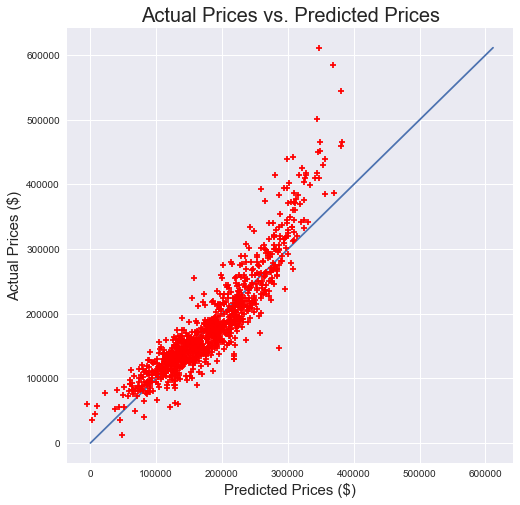

In [84]:
# Scatterplot of Actual Prices vs. Predicted Prices

# Y - Y_hat
predictions  =  model.predict(X)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(y_hat, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Prices ($)", size=15)
plt.ylabel("Actual Prices ($)", size=15)
plt.title("Actual Prices vs. Predicted Prices", size=20)

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

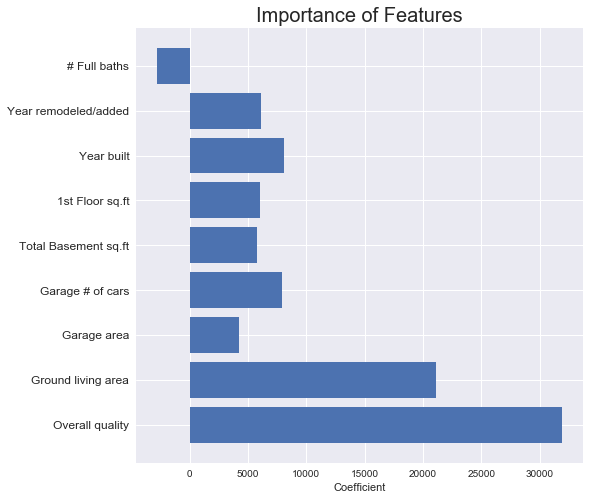

In [127]:
# # Bar chart of feature importances (coefficients)
# coeffs = linreg.coef_
# labels = ('Overall quality', 'Ground living area', 'Garage area', 'Garage # of cars',
#        'Total Basement sq.ft', '1st Floor sq.ft', 'Year built', 'Year remodeled/added',
#        '# Full baths', 'Total rooms above ground')
# ht = np.arange(len(labels))

# plt.figure(figsize=(8,8))
# plt.bar(coeffs, height=ht)
# plt.xlabel("Predicted Prices ($)", size=15)
# plt.xticks(labels)
# plt.ylabel("Actual Prices ($)", size=15)
# plt.title("Importance of Features", size=20)

# plt.plot([0, np.max(y)], [0, np.max(y)])

# plt.show()

N = 9
coeffs = linreg.coef_
labels = ('Overall quality', 'Ground living area', 'Garage area', 'Garage # of cars',
       'Total Basement sq.ft', '1st Floor sq.ft', 'Year built', 'Year remodeled/added',
       '# Full baths', 'Total rooms above ground')
ind = np.arange(N)
#ht = [x for x in range(1, 9)]

plt.figure(figsize=(8,8))
plt.barh(ind, coeffs)
plt.title("Importance of Features", size=20)
plt.yticks(ind, labels, size=12)
plt.xlabel('Coefficient')

plt.show()

In [71]:
# Create predictions dataframe for Kaggle
predictions = pd.DataFrame(y_pred, columns=['SalePrice'])
predictions = pd.concat([df_test['Id'].to_frame(),predictions],axis=1)
predictions.to_csv('regression_submission.csv', index=False)

In [72]:
predictions.head()

,Id,SalePrice
0,2658,154657.223985
1,2718,200056.700859
2,2414,203064.929420
3,1989,130198.669274
4,625,179431.909823


In [73]:
# Confirm the file has the correct number of rows and columns (879 rows, 2 columns)
predictions.shape

(879, 2)